![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

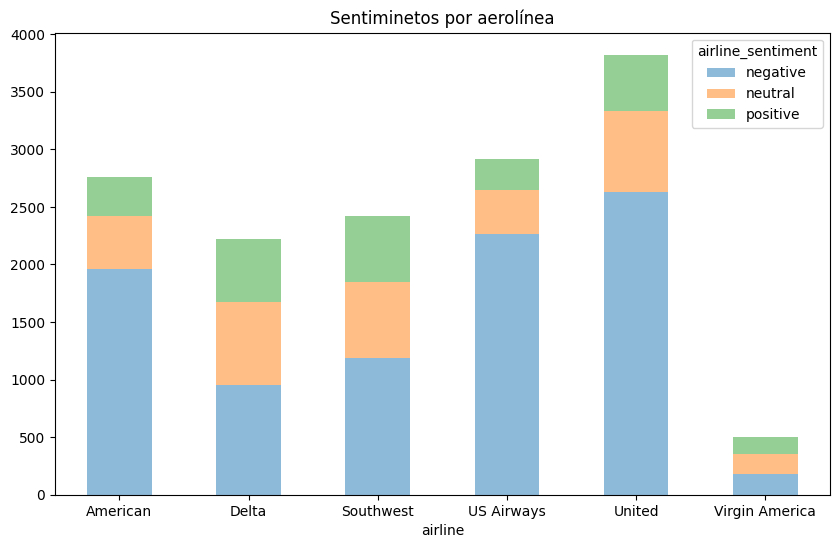

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# Preprocesamiento de texto con CountVectorizer
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Creación del modelo RandomForestRegressor con parámetros ajustados
model = RandomForestClassifier(random_state=0)

# Entrenar el modelo con los datos vectorizados
model.fit(X_train_vect, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = model.predict(X_test_vect)

# Calculate accuracy
accuracy_vectorizer = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_vectorizer)

Accuracy: 0.7737996688741722


## Análisis

En el punto 1 se utiliza el método CountVectorizer para procesar los tweets y luego de aplicar un modelo de Random Forest Classifier el accuracy es de 77,36%, lo que indica que fue capaz de hacer predicciones confiables.

Es importante resaltar que este método de preprocesamiento tiene puntos importantes de mejora. Como no tener en cuenta la relevancia de las palabras en un contexto o tomar palabras que son sinónimos como palabras diferentes.

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Preprocesamiento de texto con CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Creación del modelo RandomForestRegressor con parámetros ajustados
model_sinstopwords = RandomForestClassifier(random_state=0)

# Entrenar el modelo con los datos vectorizados
model_sinstopwords.fit(X_train_vect, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = model_sinstopwords.predict(X_test_vect)

# Calcular el accuracy
accuracy_stopwords = accuracy_score(y_test, y_pred)

print("Accuracy del modelo sin stopwords:", accuracy_stopwords)

Accuracy del modelo sin stopwords: 0.761796357615894


## Análisis

En el punto 2, al utilizar el método de CountVectorizer sin utilizar las "stopwords" del idioma inglés (un ejemplo de las stopwords en inglés es: I,
me, my, myself, we, our, ours, ourselves, you, your, yours, yourself, yourselves, he, him, his, himself, she, her, hers, herself, it, its, itself).
 Luego, aplicando el mismo modelo de Random Forest Classifier, se obtiene un accuracy del 76.18%. Este resultado indica que eliminar las stopwords tiene un efecto negativo en la precisión del modelo frente a utilizarlas.

Debemos resaltar que esto depende del contexto de los datos que estamos utilizando. Para este caso, parece que algunas las stopwords aportaban valor en la predicción.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [16]:
import nltk
# Descargar los paquetes necesarios de nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

# Función para lematizar los textos con enfoque en los verbos
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)  # Usa 'punkt' para esta tokenización
    return ' '.join([lemmatizer.lemmatize(w, pos='v') for w in words])

# Lematización de los datos de entrenamiento y prueba
X_train_lemmatized = X_train.apply(lemmatize_text)
X_test_lemmatized = X_test.apply(lemmatize_text)

# Vectorización de los textos
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train_lemmatized)
X_test_vect = vectorizer.transform(X_test_lemmatized)

# Creación y entrenamiento del modelo
model = RandomForestClassifier(random_state=0)
model.fit(X_train_vect, y_train)

# Predicción y evaluación del modelo
y_pred = model.predict(X_test_vect)
accuracy_lema = accuracy_score(y_test, y_pred)

print("Accuracy con lematización de verbos:", accuracy_lema)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy con lematización de verbos: 0.7746274834437086


## Análisis

En el punto 3, al utilizar el método CounVectorizer y procesar el texto con lematización de verbos (es decir reduciendo las formas conjugadas de los verbos a su forma base) y utilizando nuevamente el modelo de Random Forest Classifier obtenemos un accuracy del 77.46%, el más alto hasta ahora demostrando un mayor poder de precisión.

Al llevar las palabras a su forma base podemos obtener ventajas en este contexto puesto que podemos tener un diccionario sobre conceptos que hayan sido clasificados como negativos y así los que sean similares entren en la misma categoría.



### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [18]:
wordnet_lemmatizer = WordNetLemmatizer()

# función para lematizar el texto con verbos
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word , pos='v') for word in words]

# Crear un objeto CountVectorizer con la función de lematización split_into_lemmas
vectorizer = CountVectorizer(stop_words='english', analyzer=split_into_lemmas)

X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Crear y entrenar el modelo de Random Forest
modelo_rf = RandomForestClassifier(random_state=0)
modelo_rf.fit(X_train_vect, y_train)

y_pred = modelo_rf.predict(X_test_vect)

accuracy_all = accuracy_score(y_test, y_pred)

# Imprimir el accuracy del modelo
print("Accuracy del modelo de Random Forest con todos los pasos de preprocesamiento:", accuracy_all)

Accuracy del modelo de Random Forest con todos los pasos de preprocesamiento: 0.7599337748344371


## Análisis

En el punto 4 utilizamos el método CountVectorizer y a continuación procesamos los tweets sin las stopwords y lematizando los verbos. Al igual que en puntos anteriores aplicamos el modelo de Random Forest Classifier obteniendo un accuracy de 75.99% que es el resultado más bajo de las 4 variaciones de procesamiento de texto.

Es contraintuitivo teniendo en cuenta que habíamos visto mejoras usando lematización. Pero nuevamente esto podría darnos información del contexto de los datos que estamos analizando y qué tan beneficioso es o no quitar las stopwords aunque apliquemos lematización.

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

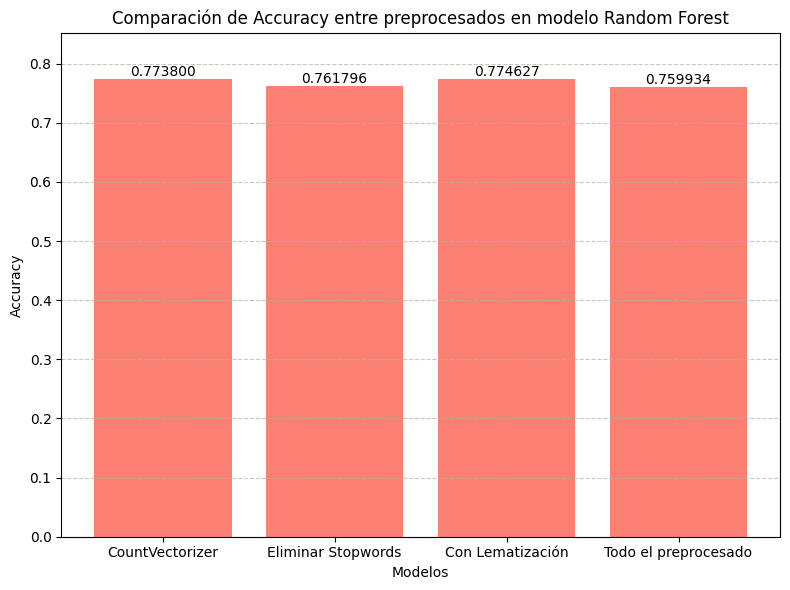

In [20]:
# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(["CountVectorizer","Eliminar Stopwords", "Con Lematización", "Todo el preprocesado"], [accuracy_vectorizer, accuracy_stopwords,
                                                                                                accuracy_lema, accuracy_all], color='salmon')

# Agregar etiquetas a las barras
for i, valor in enumerate([accuracy_vectorizer, accuracy_stopwords, accuracy_lema, accuracy_all]):
    plt.text(i, valor, f'{valor:.6f}', ha='center', va='bottom')

# Títulos y etiquetas
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy entre preprocesados en modelo Random Forest')
plt.ylim(0, max([accuracy_vectorizer, accuracy_stopwords, accuracy_lema, accuracy_all]) * 1.1)  # Establecer límites en el eje y para una mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

## Conclusiones

En el preprocesamiento de tweets se utilizó diferentes variantes:
1. Utilizando todo el texto
2. Eliminando las stopwords
3. Con lematización
4. Sin stopwords + lematización

- El mejor accuracy se obtiene en el caso donde solo usamos lematización. Seguido del caso en el que usamos todo el texto para predecir. Se concluye en este caso, que utilizar las formas base de los verbos permite que el modelo clasifique de una mejor forma los sentimientos de los tweets.

- La eliminación de los stopwords (tanto en su análisis solo eliminando stopwords, como en la combinación con la lematización) no genera un beneficio que permita una mejora en la clasificación del sentimiento de los tweets.

- Para el contexto utilizado (análisis de tweets) podríamos entrar a pensar que tener en cuenta todo el contenido del tweet sea beneficioso para conocer su intención. Además como se trata de una red social pueden tener abreviaciones o distintas formas no formales de escribir ciertas palabras que podrían tomarse en cuenta a la hora de eliminar o preprocesar palabras para así mejorar el accuracy.